[[-3.20750776  1.25363524 -0.78911064 -3.75616963  3.03472074 -2.14210104]
 [ 2.41612034  0.15718206  3.74279118 -2.15693274  2.52765878  3.92002537]
 [ 1.96052467 -1.88956609  1.76151442  0.37966511 -3.07850893  3.20868513]
 [-1.6368407  -2.87556508 -1.18319483 -1.41081452 -0.77914168  0.96581627]
 [ 1.5708753   0.36748962 -3.2128013   0.49730674 -2.2977216   2.0094757 ]
 [-0.20122031 -1.23236355 -2.54481147  1.30400751  2.42658926  3.37411747]
 [-0.34027103  3.98406086 -3.2907281  -2.33362491  0.17332983 -2.32508672]
 [-1.1269173  -0.61973368  3.62189816  3.91915838 -3.83090261 -0.78835124]]
Generation :  0
Fitness
[-60.1940901  -34.56314312  38.46763499  -7.96026515  12.62065297
 -43.27779072 -23.49359925  74.84941311]
Best result :  74.84941310580183
Parents
[[-1.1269173  -0.61973368  3.62189816  3.91915838 -3.83090261 -0.78835124]
 [ 1.96052467 -1.88956609  1.76151442  0.37966511 -3.07850893  3.20868513]
 [ 1.5708753   0.36748962 -3.2128013   0.49730674 -2.2977216   2.0094757 ]
 [

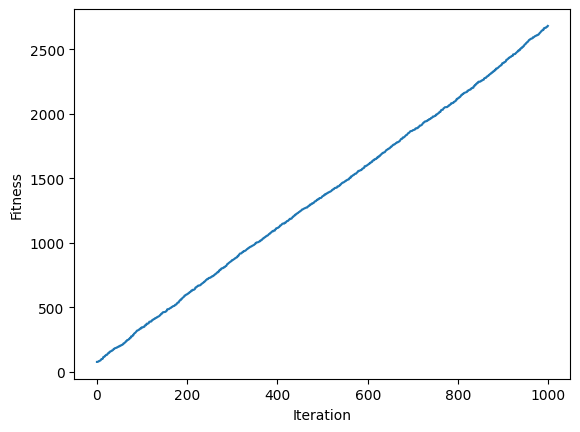

In [23]:
import numpy
import ga

"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

"""
new_population[0, :] = [2.4,  0.7, 8, -2,   5,   1.1]
new_population[1, :] = [-0.4, 2.7, 5, -1,   7,   0.1]
new_population[2, :] = [-1,   2,   2, -3,   2,   0.9]
new_population[3, :] = [4,    7,   12, 6.1, 1.4, -4]
new_population[4, :] = [3.1,  4,   0,  2.4, 4.8,  0]
new_population[5, :] = [-2,   3,   -7, 6,   3,    3]
"""

best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()



# Prediction

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model(r'C:\Users\krish\ai-power-converter\machine-learning\model_5_256.h5')

with open(r'C:\Users\krish\ai-power-converter\machine-learning\scaler_X.pkl', 'rb') as f:
    scaler_X = pickle.load(f)

# Define the input values
input_values = np.array([0.0006521052631578,0.0001194736842105,143157.89473684208])  # Replace these values with your actual input values

# Reshape the input data to ensure it is in the correct shape for normalization
input_values_reshaped = input_values.reshape(1, -1)  # Reshape to (1, 3)

# Fit the scaler to the training data and transform the new input data
input_values_scaled = scaler_X.transform(input_values_reshaped)

# Make predictions using the model
prediction = model.predict(input_values_scaled)

# Define the original output values obtained from your simulation
original_output = np.array([0.0867577616798147,1.8022857528367369,3.1017004916475472,3.1017004916475472,0.0155677936159264,1.3457323804555696])  # Replace these values with your actual output values

# Calculate the mean absolute error between original and predicted output values
mae = np.mean(np.abs(original_output - prediction))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((original_output - prediction) / original_output)) * 100

# Print the original and predicted output values for comparison
print("Original output:", original_output)
print("Predicted output:", prediction)
print("Mean Absolute Error:", mae)
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Assign predictions to variables
Delta_IL_percent = prediction[0][0]
Delta_Vo_percent = prediction[0][1]
P_l_s1 = prediction[0][2]
P_l_s2 = prediction[0][3]
P_l_C = prediction[0][4]
P_l_L_Cu = prediction[0][5]

# Print the predictions
print("Delta Current:", Delta_IL_percent)
print("Delta Voltage:", Delta_Vo_percent)
print("Pl_s1:", Pl_s1)
print("Pl_s2:", Pl_s2)
print("Pl_C:", Pl_C)
print("Pl_L_Cu:", Pl_L_Cu)




1/1 [==============================] - 0s 280ms/step
Original output: [0.08675776 1.80228575 3.10170049 3.10170049 0.01556779 1.34573238]
Predicted output: [[0.07611273 2.215468   3.096919   3.093316   0.01535417 1.3317415 ]]
Mean Absolute Error: 0.07519960021255918
Mean Absolute Percentage Error (MAPE): 6.338601044481275%
Delta Current: 0.07611273
Delta Voltage: 2.215468
Pl_s1: 3.096919
Pl_s2: 3.093316
Pl_C: 0.015354172
Pl_L_Cu: 1.3317415


# Optimization

In [ ]:
import itertools
import numpy as np

# Constants
V_in = 48
V_out = 12
R_on = 5.6
t_rise = 110e-9
t_fall = 78e-9

L = [30e-6, 2000e-6]  
C = [20e-6, 1000e-6]
fsw_range = (20e3, 200e3)  # Range for fsw

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values_all = np.arange(L[0], L[1] + 1e-6, 1e-6)
L_values_round = np.around(L_values_all, decimals=6) 
L_values = np.random.choice(L_values_round, num_values, replace=False)

C_values_all = np.arange(C[0], C[1] + 1e-6, 1e-6)
C_values_round = np.around(C_values_all, decimals=6) 
C_values = np.random.choice(C_values_round, num_values, replace=False)

fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values).astype(int)




Generation :  0
Fitness
[ 7.0995893  6.3798094 12.011652   5.8481436 10.62414    9.940194
 17.881948   8.618026  11.546858   8.225836   7.147614  15.358589 ]
Best result :  5.8481436
Best solution :  [2.1381e+04 4.1500e-04 3.0400e-04]
Best fitness :  5.8481436
Parents
[[1.20350e+05 1.14800e-03 5.20000e-05]
 [1.43090e+05 1.06700e-03 3.80000e-05]
 [9.73630e+04 9.28000e-04 2.10000e-05]
 [1.81049e+05 6.43000e-04 3.40000e-05]
 [1.91325e+05 1.00500e-03 8.30000e-05]
 [1.26000e+05 1.15500e-03 3.80000e-05]
 [7.96990e+04 1.45400e-03 4.80000e-05]
 [1.79945e+05 6.84000e-04 7.70000e-05]]
Crossover
[[1.20350e+05 1.06700e-03 3.80000e-05]
 [1.43090e+05 9.28000e-04 2.10000e-05]
 [9.73630e+04 6.43000e-04 3.40000e-05]
 [1.81049e+05 1.00500e-03 8.30000e-05]]
Mutation
[[ 1.20350875e+05 -1.75287203e-01  3.80000000e-05]
 [ 1.43089930e+05  9.27311521e-01  2.10000000e-05]
 [ 9.73632219e+04 -7.97531738e-01  3.40000000e-05]
 [ 1.81049279e+05 -7.93085276e-01  8.30000000e-05]]
Generation :  1
Fitness
[7.7445087e+0

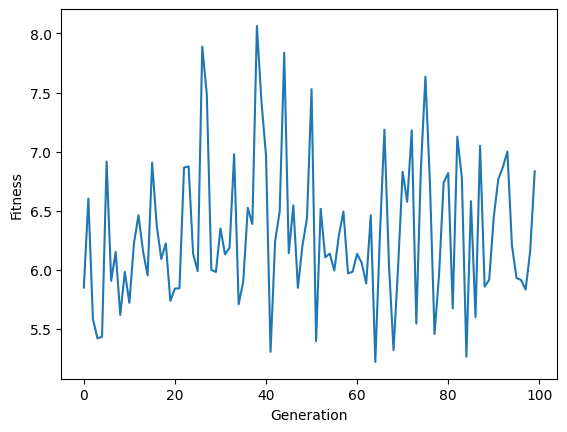

Best solutions for each generation:
Generation 0 : [5.4372e+04 1.5510e-03 3.1000e-05] Fitness: 5.8481436
Generation 1 : [1.41576e+05 1.25000e-03 7.00000e-05] Fitness: 6.6021433
Generation 2 : [1.68868e+05 8.31000e-04 3.70000e-05] Fitness: 5.5800676
Generation 3 : [7.7325e+04 1.3900e-03 4.0000e-05] Fitness: 5.4179554
Generation 4 : [5.4372e+04 1.5510e-03 3.1000e-05] Fitness: 5.4323106
Generation 5 : [7.7325e+04 1.3900e-03 4.0000e-05] Fitness: 6.9152365
Generation 6 : [1.68868e+05 8.31000e-04 3.70000e-05] Fitness: 5.905869
Generation 7 : [1.68868e+05 8.31000e-04 3.70000e-05] Fitness: 6.1502857
Generation 8 : [1.41576e+05 1.25000e-03 7.00000e-05] Fitness: 5.6168394
Generation 9 : [5.4372e+04 1.5510e-03 3.1000e-05] Fitness: 5.981476
Generation 10 : [1.41576e+05 1.25000e-03 7.00000e-05] Fitness: 5.7185073
Generation 11 : [5.4372e+04 1.5510e-03 3.1000e-05] Fitness: 6.2217207
Generation 12 : [5.4372e+04 1.5510e-03 3.1000e-05] Fitness: 6.4611673
Generation 13 : [7.7325e+04 1.3900e-03 4.0000e-0

In [1]:
import numpy as np
import ga
import pickle
import tensorflow as tf

# Load the machine learning model and scaler
model = tf.keras.models.load_model(r'C:\Users\krish\ai-power-converter\machine-learning\model_5_256.h5')
with open(r'C:\Users\krish\ai-power-converter\machine-learning\scaler_X.pkl', 'rb') as f:
    scaler_X = pickle.load(f)

# Define constraint values
Vol_lim = 7e-6
Delta_Vo_percent_lim = 1
Delta_IL_percent_lim = 10

# Genetic algorithm parameters
sol_per_pop = 12#8
num_parents_mating = 8#4
pop_size = (sol_per_pop, 3)  # We have 3 variables: fs, L, C

# Generate initial population
L_range = [30e-6, 2000e-6]
C_range = [20e-6, 1000e-6]
fsw_range = [20e3, 200e3]
num_values = sol_per_pop

# Generate all possible values within the specified range with the desired increment
L_values_all = np.arange(L_range[0], L_range[1] + 1e-6, 1e-6)
C_values_all = np.arange(C_range[0], C_range[1] + 1e-6, 1e-6)

# Randomly choose values from the generated arrays
L_values = np.random.choice(L_values_all, sol_per_pop, replace=False)
C_values = np.random.choice(C_values_all, sol_per_pop, replace=False)

fsw_values = np.random.randint(fsw_range[0], fsw_range[1] + 1, size=sol_per_pop)

initial_population = np.column_stack((fsw_values, L_values, C_values))

# Define the fitness function
def calculate_fitness(individual):
    # Decode the individual to get fs, L, and C values
    fs = individual[0]
    L = individual[1]
    C = individual[2]
    
    # Prepare input values for prediction
    input_values = np.array([L, C, fs])
    input_values_reshaped = input_values.reshape(1, -1)
    
    # Scale input values using the loaded scaler
    input_values_scaled = scaler_X.transform(input_values_reshaped)
    
    # Make predictions using the loaded model
    prediction = model.predict(input_values_scaled, verbose=0)
    
    # Extract predictions from the model output
    P_l_s1 = prediction[0][2]
    P_l_s2 = prediction[0][3]
    P_l_C = prediction[0][4]
    P_l_L_Cu = prediction[0][5]
    
    # Calculate the objective function value based on the given equation
    objective_value = P_l_s1 + P_l_s2 + P_l_L_Cu + P_l_C
    
    return objective_value


# Define the constraints function
def check_constraints(individual):
    fs = individual[0]
    L = individual[1]
    C = individual[2]
    
    # Define the constraint values
    # Vol_L =  # Define Vol_L based on your problem-specific requirements
    # Vol_C =  # Define Vol_C based on your problem-specific requirements
    # Prepare input values for prediction
    input_values = np.array([L, C, fs])
    input_values_reshaped = input_values.reshape(1, -1)
    
    # Scale input values using the loaded scaler
    input_values_scaled = scaler_X.transform(input_values_reshaped)
    
    # Make predictions using the loaded model
    prediction = model.predict(input_values_scaled, verbose=0)
    
    # Extract predictions from the model output
    Delta_IL_percent = prediction[0][0]
    Delta_Vo_percent = prediction[0][1]

    # Check if constraints are satisfied
    # constraint1 = Vol_L + Vol_C <= Vol_lim
    constraint2 = Delta_Vo_percent <= Delta_Vo_percent_lim
    constraint3 = Delta_IL_percent <= Delta_IL_percent_lim
    
    # return constraint1 and constraint2 and constraint3
    return constraint2 and constraint3  


# Genetic Algorithm optimization
best_outputs = []
best_solutions = []  # Store the best solution for each generation
best_fitnesses = []  # Store the best fitness for each generation
num_generations = 100
new_population = initial_population

for generation in range(num_generations):
    print("Generation : ", generation)
    
    # Measuring the fitness of each chromosome in the population.
    fitness_values = []
    delta_IL_percent_values = []
    delta_Vo_percent_values = []
    for individual in new_population:
        fitness_value = calculate_fitness(individual)
        fitness_values.append(fitness_value)

    fitness = np.array(fitness_values)

    
    print("Fitness")
    print(fitness)

    best_outputs.append(np.min(fitness))
    print("Best result : ", np.min(fitness))

    # Find the index of the best solution in this generation
    best_solution_idx = np.argmin(fitness)
    best_solution = new_population[best_solution_idx]
    best_solutions.append(best_solution)
    best_fitness = fitness[best_solution_idx]
    best_fitnesses.append(best_fitness)
    print("Best solution : ", best_solution)
    print("Best fitness : ", best_fitness)
    
    # Check and enforce constraints
    for i in range(sol_per_pop):
        if not check_constraints(new_population[i]):
            # Regenerate individual until it satisfies the constraints
            while not check_constraints(new_population[i]):
                # Generate new random values for fsw, L, and C
                new_L = np.random.choice(L_values_all, 1, replace=False)
                new_C = np.random.choice(C_values_all, 1, replace=False)
                new_fsw = np.random.randint(fsw_range[0], fsw_range[1] + 1, size=1)
                # Assign the new values to the individual
                new_population[i] = [new_fsw[0], new_L[0], new_C[0]]



    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents, offspring_size=(pop_size[0]-parents.shape[0], 3))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga.mutation(offspring_crossover, 2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness_values = []

for individual in new_population:
    fitness_value= calculate_fitness(individual)
    fitness_values.append(fitness_value)

fitness = np.array(fitness_values)


# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.min(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

import matplotlib.pyplot as plt
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

# Print the best solutions for each generation
print("Best solutions for each generation:")
for i, (solution, fitness) in enumerate(zip(best_solutions, best_fitnesses)):
    print("Generation", i, ":", solution, "Fitness:", fitness)


In [14]:
# Generate all possible values within the specified range with the desired increment
L_values_all = np.arange(L_range[0], L_range[1] + 1e-6, 1e-6)
C_values_all = np.arange(C_range[0], C_range[1] + 1e-6, 1e-6)

# Randomly choose values from the generated arrays
L_values = np.random.choice(L_values_all, 10, replace=False)
C_values = np.random.choice(C_values_all, 10, replace=False)

new_fsw = np.random.randint(fsw_range[0], fsw_range[1] + 1, size=1)


print(L_values)
print(C_values)
print(new_fsw)

[0.000527 0.000794 0.001283 0.001838 0.00047  0.000627 0.001991 0.00084
 0.000313 0.000827]
[0.000733 0.000153 0.000423 0.000594 0.00063  0.000778 0.000961 0.000709
 0.00014  0.000422]
[110611]
